# Рябов Даниил Александрович 19-ИВТ-2

## ЛР 4

## 1)  
## Набор данных содержит признаки:
### 1. date - дата
### 2. Appliances - потребление энергии электроприборами
### 3. lights - потребление энергии световыми приборами
### 4. T1 - температура в кухонной зоне в градусах
### 5. RH_1 - влажность в кухонной зоне в % 
### 6. T2 - температура в зоне гостинной в грудусах
### 7. RH_2 влажность в зоне гостинной в %
### 8. T3 - температура в прачечной в градусах
### 9. RH_3 - влажность в прачечной в %
### 10. T4 - температура в офисе в грдусах
### 11. RH_4 - влажнсоть в офисе в %
### 12. T5 - температура в ванной в градусах
### 13. RH_5 - влажность в ванной в %
### 14. T6 - температура снаружи здания(северная сторона) в градусах
### 15. RH_6 влажность снаружи здания (северная сторона) в %
### 16. T7 -  температура в гладильной комнате в градусах
### 17. RH_7 - влажность в гладильной комнате в %
### 18. T8 - температура в детской комнате в грудусах
### 19. RH_8 - влажность в детской комнате в %
### 20. T9 - температура в комнате родителей в градусах
### 21. RH_9 - влажность в комнате родителей в %
### 22. T_out - температура снаружи (по данным метеостанции) в градусах 
### 23. Press_mm_hg - давление снаружи в миллиметрах ртутного столба
### 24. RH_out - влажность снаружи( по данным метеостанции) в %
### 25. Windspeed - скорость ветра(по данным метеостанции) в метрах в секнду
### 26. Visibility - видимость( по данным метеостанции) в километрах
### 27. Tdewpoint - точка росы
### 28. rv1 - случайная переменна 1
### 29. rv2 - случайная перемнная 2

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge

In [51]:
energy_df = pd.read_csv('energydata_complete.csv')
energy_df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


## 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [52]:
energy_df.shape

(19735, 29)

In [53]:
energy_df = energy_df.drop_duplicates()
energy_df.shape

(19735, 29)

## 3)	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [54]:
numerical = [i for i in energy_df.columns if energy_df[i].dtype.name != 'object']
categorial = [i for i in energy_df.columns if energy_df[i].dtype.name == 'object']
print("Numerical",numerical)
print("Categorial",categorial)

Numerical ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
Categorial ['date']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Appliances'),
  Text(1, 0, 'lights'),
  Text(2, 0, 'T1'),
  Text(3, 0, 'RH_1'),
  Text(4, 0, 'T2'),
  Text(5, 0, 'RH_2'),
  Text(6, 0, 'T3'),
  Text(7, 0, 'RH_3'),
  Text(8, 0, 'T4'),
  Text(9, 0, 'RH_4'),
  Text(10, 0, 'T5'),
  Text(11, 0, 'RH_5'),
  Text(12, 0, 'T6'),
  Text(13, 0, 'RH_6'),
  Text(14, 0, 'T7'),
  Text(15, 0, 'RH_7'),
  Text(16, 0, 'T8'),
  Text(17, 0, 'RH_8'),
  Text(18, 0, 'T9'),
  Text(19, 0, 'RH_9'),
  Text(20, 0, 'T_out'),
  Text(21, 0, 'Press_mm_hg'),
  Text(22, 0, 'RH_out'),
  Text(23, 0, 'Windspeed'),
  Text(24, 0, 'Visibility'),
  Text(25, 0, 'Tdewpoint'),
  Text(26, 0, 'rv1'),
  Text(27, 0, 'rv2')])

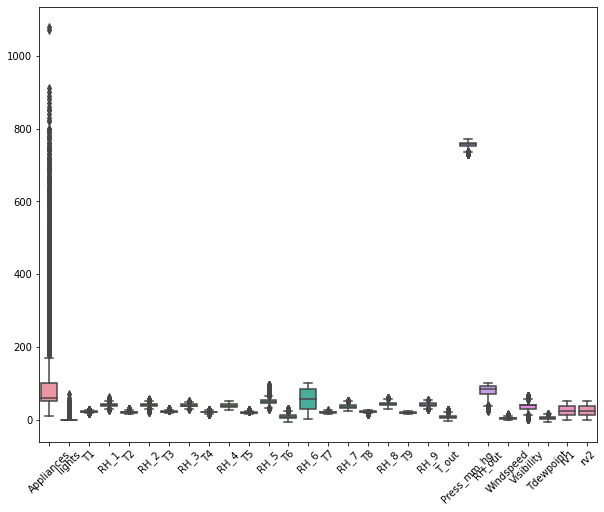

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(data=energy_df[numerical])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Appliances'),
  Text(1, 0, 'lights'),
  Text(2, 0, 'T1'),
  Text(3, 0, 'RH_1'),
  Text(4, 0, 'T2'),
  Text(5, 0, 'RH_2'),
  Text(6, 0, 'T3'),
  Text(7, 0, 'RH_3'),
  Text(8, 0, 'T4'),
  Text(9, 0, 'RH_4'),
  Text(10, 0, 'T5'),
  Text(11, 0, 'RH_5'),
  Text(12, 0, 'T6'),
  Text(13, 0, 'RH_6'),
  Text(14, 0, 'T7'),
  Text(15, 0, 'RH_7'),
  Text(16, 0, 'T8'),
  Text(17, 0, 'RH_8'),
  Text(18, 0, 'T9'),
  Text(19, 0, 'RH_9'),
  Text(20, 0, 'T_out'),
  Text(21, 0, 'Press_mm_hg'),
  Text(22, 0, 'RH_out'),
  Text(23, 0, 'Windspeed'),
  Text(24, 0, 'Visibility'),
  Text(25, 0, 'Tdewpoint'),
  Text(26, 0, 'rv1'),
  Text(27, 0, 'rv2')])

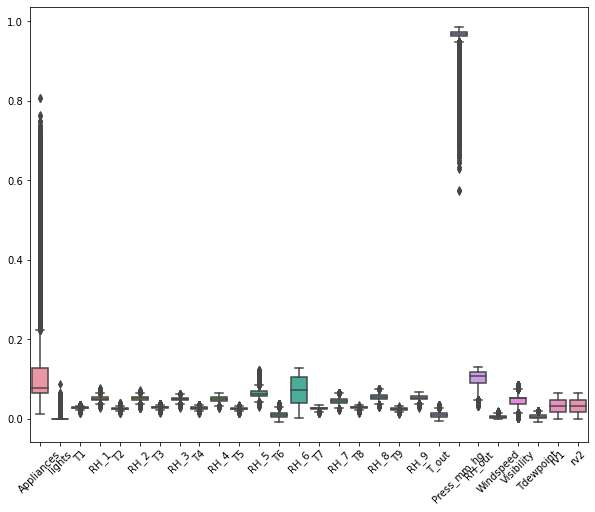

In [56]:
energy_df[numerical] = preprocessing.normalize(energy_df[numerical])
plt.figure(figsize=(10,8))
sns.boxplot(data=energy_df[numerical])
plt.xticks(rotation=45)

In [57]:
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.078588,0.039294,0.026052,0.062342,0.025148,0.058666,0.025921,0.058587,0.024886,...,0.022310,0.059635,0.008645,0.960735,0.120501,0.009169,0.082517,0.006942,0.017388,0.017388
1,2016-01-11 17:10:00,0.078593,0.039296,0.026054,0.061163,0.025150,0.058581,0.025923,0.058670,0.024888,...,0.022355,0.059678,0.008492,0.960929,0.120509,0.008733,0.077501,0.006811,0.024372,0.024372
2,2016-01-11 17:20:00,0.065533,0.039320,0.026069,0.060684,0.025165,0.058490,0.025938,0.058892,0.024806,...,0.022281,0.059635,0.008345,0.961632,0.120581,0.008301,0.072523,0.006684,0.037541,0.037541
3,2016-01-11 17:30:00,0.065372,0.052297,0.026005,0.060229,0.025103,0.058298,0.025874,0.058834,0.024697,...,0.022226,0.059357,0.008171,0.959392,0.120284,0.007845,0.067333,0.006537,0.059371,0.059371
4,2016-01-11 17:40:00,0.078635,0.052423,0.026068,0.060724,0.025163,0.058360,0.025936,0.058976,0.024757,...,0.022280,0.059501,0.008038,0.961839,0.120574,0.007427,0.062471,0.006422,0.013216,0.013216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,0.127920,0.000000,0.032705,0.059560,0.033119,0.053759,0.034794,0.052656,0.031596,...,0.029678,0.059854,0.029081,0.966054,0.071209,0.004264,0.030274,0.017056,0.055130,0.055130
19731,2016-05-27 17:30:00,0.115200,0.000000,0.032640,0.059520,0.032965,0.053863,0.034731,0.052766,0.031616,...,0.029696,0.059891,0.028928,0.966659,0.071680,0.004480,0.031360,0.017024,0.063082,0.063082
19732,2016-05-27 17:40:00,0.329310,0.012197,0.031102,0.056832,0.031258,0.052163,0.032992,0.050848,0.030126,...,0.028296,0.057068,0.027402,0.921093,0.068708,0.004472,0.030898,0.016181,0.035613,0.035613
19733,2016-05-27 17:50:00,0.477364,0.011366,0.028983,0.053408,0.028885,0.048914,0.030563,0.046929,0.028074,...,0.026369,0.053212,0.025384,0.858347,0.064406,0.004357,0.029741,0.015041,0.007186,0.007186


## 4)	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [58]:
labelEncoder = LabelEncoder() 
energy_df['date'] = labelEncoder.fit_transform(energy_df['date'])
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,0.078588,0.039294,0.026052,0.062342,0.025148,0.058666,0.025921,0.058587,0.024886,...,0.022310,0.059635,0.008645,0.960735,0.120501,0.009169,0.082517,0.006942,0.017388,0.017388
1,1,0.078593,0.039296,0.026054,0.061163,0.025150,0.058581,0.025923,0.058670,0.024888,...,0.022355,0.059678,0.008492,0.960929,0.120509,0.008733,0.077501,0.006811,0.024372,0.024372
2,2,0.065533,0.039320,0.026069,0.060684,0.025165,0.058490,0.025938,0.058892,0.024806,...,0.022281,0.059635,0.008345,0.961632,0.120581,0.008301,0.072523,0.006684,0.037541,0.037541
3,3,0.065372,0.052297,0.026005,0.060229,0.025103,0.058298,0.025874,0.058834,0.024697,...,0.022226,0.059357,0.008171,0.959392,0.120284,0.007845,0.067333,0.006537,0.059371,0.059371
4,4,0.078635,0.052423,0.026068,0.060724,0.025163,0.058360,0.025936,0.058976,0.024757,...,0.022280,0.059501,0.008038,0.961839,0.120574,0.007427,0.062471,0.006422,0.013216,0.013216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,19730,0.127920,0.000000,0.032705,0.059560,0.033119,0.053759,0.034794,0.052656,0.031596,...,0.029678,0.059854,0.029081,0.966054,0.071209,0.004264,0.030274,0.017056,0.055130,0.055130
19731,19731,0.115200,0.000000,0.032640,0.059520,0.032965,0.053863,0.034731,0.052766,0.031616,...,0.029696,0.059891,0.028928,0.966659,0.071680,0.004480,0.031360,0.017024,0.063082,0.063082
19732,19732,0.329310,0.012197,0.031102,0.056832,0.031258,0.052163,0.032992,0.050848,0.030126,...,0.028296,0.057068,0.027402,0.921093,0.068708,0.004472,0.030898,0.016181,0.035613,0.035613
19733,19733,0.477364,0.011366,0.028983,0.053408,0.028885,0.048914,0.030563,0.046929,0.028074,...,0.026369,0.053212,0.025384,0.858347,0.064406,0.004357,0.029741,0.015041,0.007186,0.007186


## 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

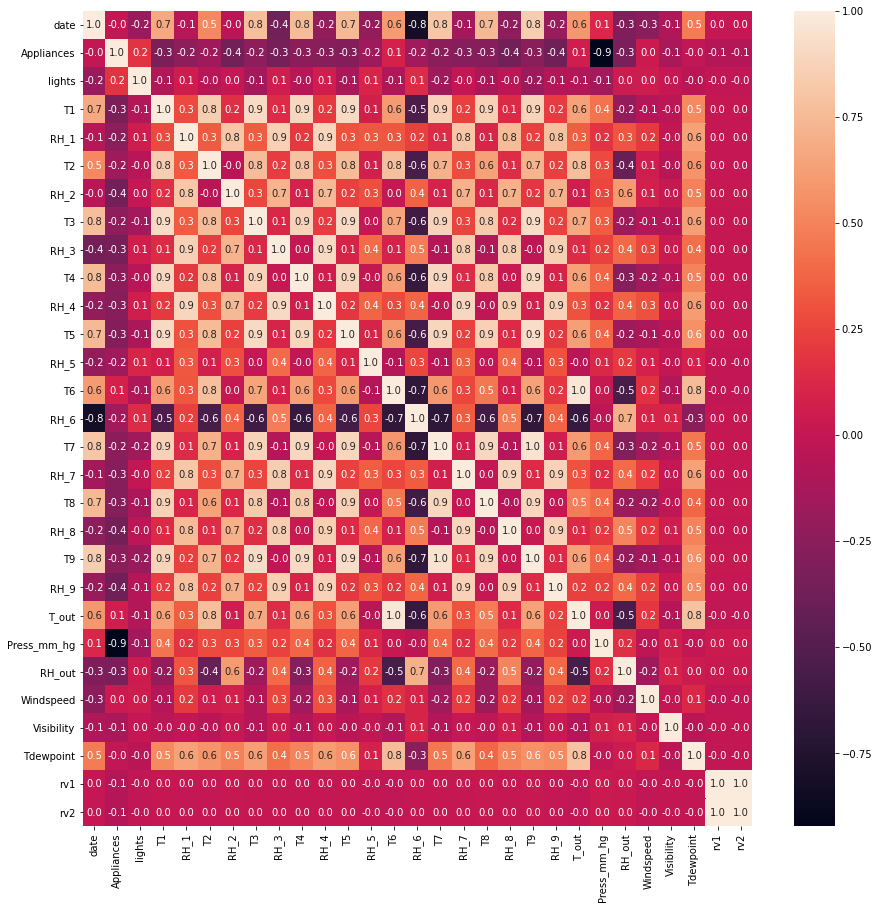

In [59]:
energy_corr_df = energy_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(energy_corr_df, annot=True, fmt='.1f')

## 6) Заполните пропущенные значения в данных;

In [60]:
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Пропущеных значений нет

## 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [61]:
x, y = energy_df.drop(['T_out','RH_out'], axis=1), energy_df['RH_out']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [62]:
regression = LinearRegression()

regression.fit(x_train, y_train)

y_pred = regression.predict(x_test)

regress_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred})
regress_df.head(10)

,Actual,Predicted,Difference
18317,0.100913,0.109915,-0.009002
8780,0.066350,0.065615,0.000735
18580,0.053405,0.055883,-0.002479
9513,0.071082,0.066853,0.004229
13318,0.114977,0.116740,-0.001763
15341,0.119373,0.116983,0.002390
8654,0.090716,0.092525,-0.001810
6434,0.107978,0.113262,-0.005284
465,0.104691,0.090353,0.014338
16239,0.074859,0.077061,-0.002202


In [63]:
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9485048150495031 p_value:  0.0
Spearman correlation:  0.9215684804492853 p_value:  0.0


In [64]:
RIDGE = Ridge()

params = {'alpha': np.arange(-6, 5, 0.05)}
RIDGE_grid = GridSearchCV(RIDGE, params)
RIDGE_grid.fit(x_train, y_train)
best_alpha = RIDGE_grid.best_estimator_.alpha

RIDGE = Ridge(alpha = best_alpha)
RIDGE.fit(x_train, y_train)

y_pred = RIDGE.predict(x_test)
print('Best alpha:', best_alpha)
RIDGE_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred})
RIDGE_df.head(10)

Best alpha: -2.1316282072803006e-14


,Actual,Predicted,Difference
18317,0.100913,0.109915,-0.009002
8780,0.066350,0.065615,0.000735
18580,0.053405,0.055883,-0.002479
9513,0.071082,0.066853,0.004229
13318,0.114977,0.116740,-0.001763
15341,0.119373,0.116983,0.002390
8654,0.090716,0.092525,-0.001810
6434,0.107978,0.113262,-0.005284
465,0.104691,0.090353,0.014338
16239,0.074859,0.077061,-0.002202


In [65]:
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9485048150495106 p_value:  0.0
Spearman correlation:  0.9215684804492853 p_value:  0.0
